In [4]:
import subprocess
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn import preprocessing

# cmd_str = "python -m pytorch_fid D:\IDG_Malta_Master_Thesis\pokemon_assets_generation\_Sprite_Sheets\PokeTypeGAN-main\sprites\sprites_front_only_all\\bug D:\IDG_Malta_Master_Thesis\pokemon_assets_generation\_Sprite_Sheets\PokeTypeGAN-main\sprites\sprites_front_only_all\\fairy"
# subprocess.run(cmd_str, shell=True)
test = ["bug", "dark", "dragon"]
original_folders_list = ["bug", "dark", "dragon", "electric", "fairy", "fighting", "fire", "flying", "ghost", "grass", "ground", "ice", "normal", "poison",  "psychic", "rock", "steel", "water"]
generated_folders_list = ["bug", "dark", "dragon", "electric", "fairy", "fighting", "fire", "flying", "ghost", "grass", "ground", "ice", "normal", "poison",  "psychic", "rock", "steel", "water"]
original_folder_path = "D:\IDG_Malta_Master_Thesis\pokemon_assets_generation\_Sprite_Sheets\PokeTypeGAN-main\sprites\sprites_front_only_all\\"
generated_folder_path = "D:\IDG_Malta_Master_Thesis\pokemon_assets_generation\_Sprite_Sheets\PokeTypeGAN-main\sprites\individual\\types\\"

test_matrix = np.zeros(shape=(2,2))
original_matrix = np.zeros(shape=(18,18))
generated_matrix = np.zeros(shape=(18,18))
original_vs_generated_matrix = np.zeros(shape=(18,18))

# TYPES

In [ ]:
# FOR TESTING
i=0
j=0
for folder_i in test:
    for folder_j in test:
        folder_i_complete = original_folder_path + folder_i
        folder_j_complete = original_folder_path + folder_j
        print(str(folder_i) + " " + str(folder_j))
        command = "python -m pytorch_fid " + folder_i_complete + " " + folder_j_complete
        FID_score = os.popen(command).read()
        FID_score = round(float(FID_score[5:]), 2)
        print(FID_score)
        test_matrix[i-1][j-1] = FID_score
        j+=1
    i+=1

print(test_matrix)
showMatrix(test_matrix, "Test")

In [ ]:
# ORIGINAL VS ORIGINAL
for folder_i in original_folders_list:
    for folder_j in original_folders_list:
        folder_i_complete = original_folder_path + folder_i
        folder_j_complete = original_folder_path + folder_j
        print(str(folder_i) + " " + str(folder_j))
        command = "python -m pytorch_fid " + folder_i_complete + " " + folder_j_complete
        print(os.popen(command).read())

In [ ]:
# GENERATED VS GENERATED
for folder_i in generated_folders_list:
    for folder_j in generated_folders_list:
        folder_i_complete = generated_folder_path + folder_i
        folder_j_complete = generated_folder_path + folder_j
        print(str(folder_i) + " " + str(folder_j))
        command = "python -m pytorch_fid " + folder_i_complete + " " + folder_j_complete
        print(os.popen(command).read())

In [ ]:
# GENERATED VS ORIGINAL
for folder_i in generated_folders_list:
    for folder_j in original_folders_list:
        folder_i_complete = generated_folder_path + folder_i
        folder_j_complete = original_folder_path + folder_j
        print(str(folder_i) + " " + str(folder_j))
        command = "python -m pytorch_fid " + folder_i_complete + " " + folder_j_complete
        print(os.popen(command).read())

In [3]:
import pandas as pd
types = ["bug", "dark", "dragon", "electric", "fairy", "fighting", "fire", "flying", "ghost", "grass", "ground", "ice", "normal", "poison",  "psychic", "rock", "steel", "water"]
num_rows = len(types)
num_cols = len(types)
data = np.zeros((num_rows, num_cols))
df_original = pd.DataFrame(data, columns=types, index=types)
df_generated = pd.DataFrame(data, columns=types, index=types)
df_generated_vs_original = pd.DataFrame(data, columns=types, index=types)

In [8]:
# USE THIS TO COMPUTE WITHOUT FAIRY
# types_no_fairy = ["bug", "dark", "dragon", "electric", "fighting", "fire", "flying", "ghost", "grass", "ground", "ice", "normal", "poison",  "psychic", "rock", "steel", "water"]
# num_rows = len(types_no_fairy)
# num_cols = len(types_no_fairy)
# data = np.zeros((num_rows, num_cols))
# df_original = pd.DataFrame(data, columns=types_no_fairy, index=types_no_fairy)
# df_generated = pd.DataFrame(data, columns=types_no_fairy, index=types_no_fairy)
# df_generated_vs_original = pd.DataFrame(data, columns=types_no_fairy, index=types_no_fairy)

In [12]:
def get_FID(first_folder, second_folder):
    command = "python -m pytorch_fid " + first_folder + " " + second_folder
    FID_score = os.popen(command).read()
    FID_score = round(float(FID_score[5:]), 2)
    return FID_score

def get_FID_dataframe_for_sets(row_list, row_folder_path, column_list, column_folder_path, same_sets):
    num_rows = len(row_list)
    num_cols = len(column_list)
    data = np.zeros((num_rows, num_cols))
    df = pd.DataFrame(data, columns=column_list, index=row_list)
    if(not same_sets):
        for folder_i in row_list:
            for folder_j in column_list:
                # if(folder_i==folder_j):
                #     continue
                folder_i_complete = row_folder_path + folder_i
                folder_j_complete = column_folder_path + folder_j
                print(str(folder_i) + " " + str(folder_j))
                command = "python -m pytorch_fid " + folder_i_complete + " " + folder_j_complete
                FID_score = os.popen(command).read()
                FID_score = round(float(FID_score[5:]), 2)
                df.loc[folder_i, folder_j] = FID_score
    else:
        for i, i_type in enumerate(row_list):
            for j in range(i, len(column_list)):
                folder_i_complete = row_folder_path + i_type
                folder_j_complete = column_folder_path + column_list[j]
                print(str(i_type) + " " + str(column_list[j]))
                FID_score = get_FID(folder_i_complete, folder_j_complete)
                df.loc[i_type, column_list[j]] = FID_score
    return df

def normalize_and_show_FID_df(df,figure_title, labels):
    
    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled)

    print(df)
    plt.figure(figsize = (12,10))
    #seaborn
    heatmap = sb.heatmap(df, cmap="Blues", xticklabels=labels, yticklabels=labels)
    # Use next line only for without fairy
    # heatmap = sb.heatmap(df, cmap="Blues", xticklabels=types_no_fairy, yticklabels=types_no_fairy)
    figure = heatmap.get_figure()
    figure.savefig(figure_title)

In [ ]:
df_test = get_FID_dataframe_for_sets(test,original_folder_path,test,original_folder_path,False)
normalize_and_show_FID_df(df_test)
# corr = df_test.corr()
# sb.heatmap(corr, cmap="Blues", annot=True)

bug bug
bug dark
bug dragon
bug electric
bug fairy
bug fighting
bug fire
bug flying
bug ghost
bug grass
bug ground
bug ice
bug normal
bug poison
bug psychic
bug rock
bug steel
bug water
dark dark
dark dragon
dark electric
dark fairy
dark fighting
dark fire
dark flying
dark ghost
dark grass
dark ground
dark ice
dark normal
dark poison
dark psychic
dark rock
dark steel
dark water
dragon dragon
dragon electric
dragon fairy
dragon fighting
dragon fire
dragon flying
dragon ghost
dragon grass
dragon ground
dragon ice
dragon normal
dragon poison
dragon psychic
dragon rock
dragon steel
dragon water
electric electric
electric fairy
electric fighting
electric fire
electric flying
electric ghost
electric grass
electric ground
electric ice
electric normal
electric poison
electric psychic
electric rock
electric steel
electric water
fairy fairy
fairy fighting
fairy fire
fairy flying
fairy ghost
fairy grass
fairy ground
fairy ice
fairy normal
fairy poison
fairy psychic
fairy rock
fairy steel
fairy wa

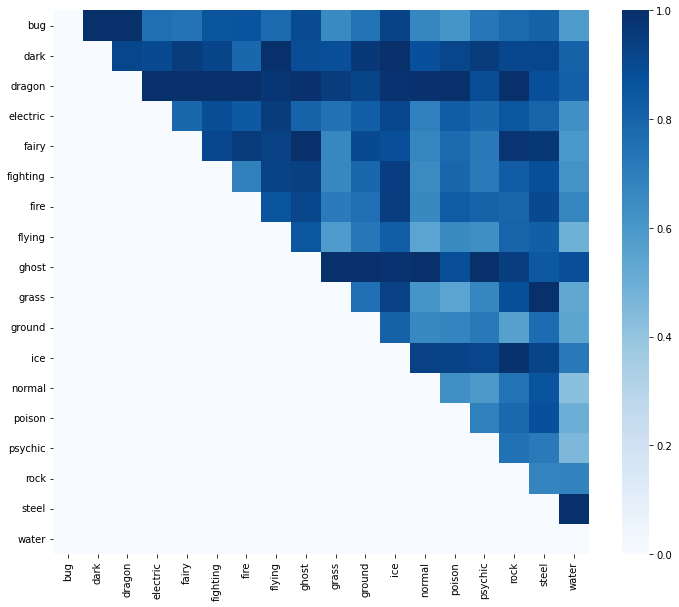

In [5]:
# ORIGINAL VS ORIGINAL
df_original = get_FID_dataframe_for_sets(types, original_folder_path, types, original_folder_path, True)
print(df_original)
normalize_and_show_FID_df(df_original,"Original FID")

In [ ]:
# GENERATED VS GENERATED
df_generated = get_FID_dataframe_for_sets(types, generated_folder_path, types, generated_folder_path, True)
print(df_generated)
normalize_and_show_FID_df(df_generated, "Generated FID")

bug bug
bug dark
bug dragon
bug electric
bug fairy
bug fighting
bug fire
bug flying
bug ghost
bug grass
bug ground
bug ice
bug normal
bug poison
bug psychic
bug rock
bug steel
bug water
dark bug
dark dark
dark dragon
dark electric
dark fairy
dark fighting
dark fire
dark flying
dark ghost
dark grass
dark ground
dark ice
dark normal
dark poison
dark psychic
dark rock
dark steel
dark water
dragon bug
dragon dark
dragon dragon
dragon electric
dragon fairy
dragon fighting
dragon fire
dragon flying
dragon ghost
dragon grass
dragon ground
dragon ice
dragon normal
dragon poison
dragon psychic
dragon rock
dragon steel
dragon water
electric bug
electric dark
electric dragon
electric electric
electric fairy
electric fighting
electric fire
electric flying
electric ghost
electric grass
electric ground
electric ice
electric normal
electric poison
electric psychic
electric rock
electric steel
electric water
fairy bug
fairy dark
fairy dragon
fairy electric
fairy fairy
fairy fighting
fairy fire
fairy f

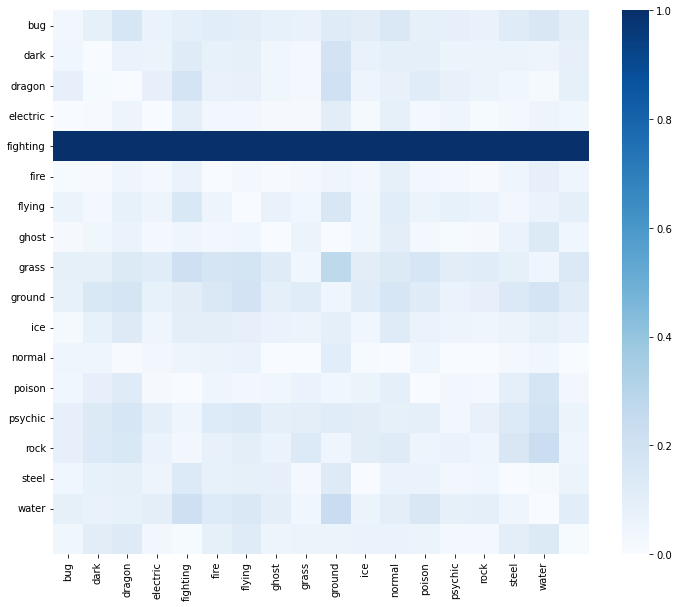

In [13]:
# GENERATED VS ORIGINAL
df_generated_vs_original = get_FID_dataframe_for_sets(types, generated_folder_path, types, original_folder_path, False)
print(df_generated_vs_original)
normalize_and_show_FID_df(df_generated_vs_original, "Generated vs Original FID")

In [ ]:
normalize_and_show_FID_df(df_original,"original_fid")
normalize_and_show_FID_df(df_generated, "generated_fid")
normalize_and_show_FID_df(df_generated_vs_original, "generated_vs_original_fid")

             bug    dark  dragon  electric   fairy  fighting    fire  flying  \
bug         0.00  115.98  141.94    112.99  105.60    111.75  104.76   99.28   
dark       96.12    0.00  119.50    112.44  109.82    105.36  101.85   91.59   
dragon    105.15   98.58    0.00    116.73  119.52    104.09   99.88   91.73   
electric   88.65   97.64  117.17      0.00  105.57     96.16   89.83   86.28   
fairy     285.04  319.89  328.08    291.71    0.00    292.29  291.09  281.04   
fighting   90.30   97.04  115.35    105.10   99.89      0.00   88.83   84.37   
fire      100.75  101.68  122.88    110.80  114.85    100.06    0.00   97.35   
flying     91.37  105.72  120.37    105.13   96.53     95.32   91.19    0.00   
ghost     105.85  115.80  135.32    122.98  124.90    123.67  121.49  108.02   
grass     104.32  129.80  144.53    116.47  107.24    118.75  122.17  102.45   
ground     91.95  114.10  133.98    109.22  106.36    109.67  100.99   95.72   
ice        97.09  106.06  106.39    106.

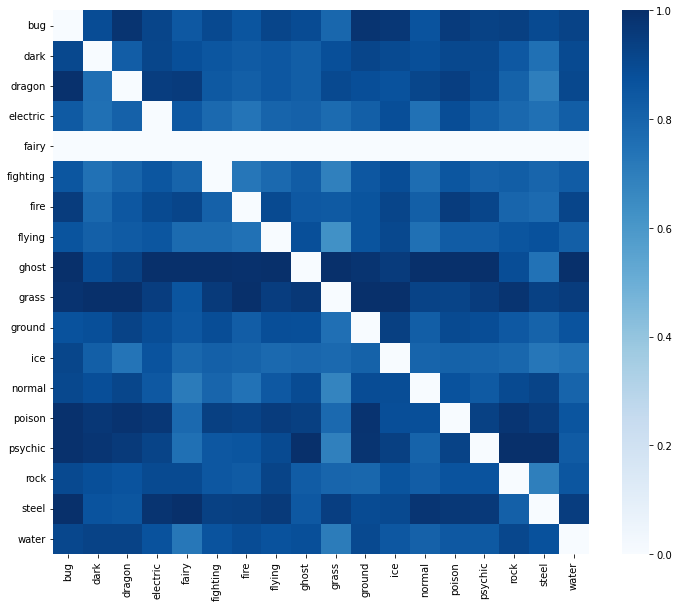

In [23]:
df_generated_vs_original_no_fairy = df_generated_vs_original
print(df_generated_vs_original_no_fairy)
df_generated_vs_original_no_fairy.loc['fairy'] = 0

normalize_and_show_FID_df(df_generated_vs_original_no_fairy, "generated_vs_original_fid_no_fairy")

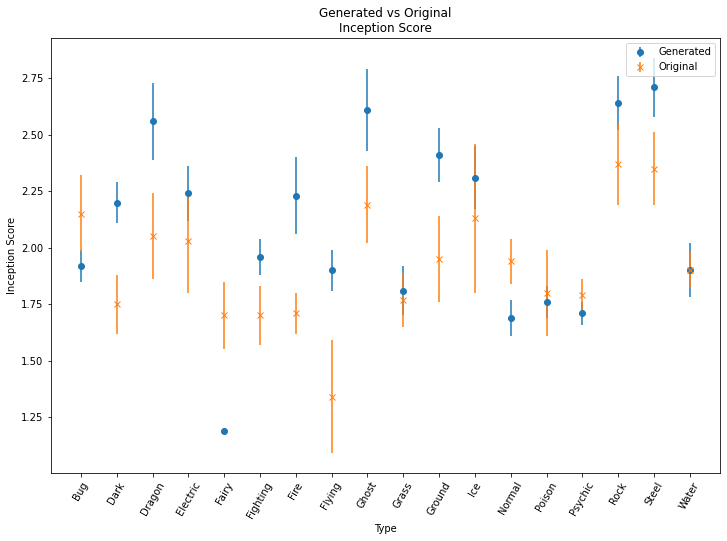

In [28]:
import matplotlib.pyplot as plt
import numpy as np

types = np.array(["Bug", "Dark", "Dragon", "Electric", "Fairy", "Fighting", "Fire", "Flying", "Ghost", "Grass", "Ground", "Ice", "Normal", "Poison", "Psychic", "Rock", "Steel", "Water"])
types_generated_is_mean = np.array([1.92, 2.20, 2.56, 2.24, 1.19, 1.96, 2.23, 1.90, 2.61, 1.81, 2.41, 2.31, 1.69, 1.76, 1.71, 2.64, 2.71, 1.90])
types_generated_is_std = np.array([0.07, 0.09, 0.17, 0.12, 0.01, 0.08, 0.17, 0.09, 0.18, 0.11, 0.12, 0.14, 0.08, 0.07, 0.05, 0.12, 0.13, 0.12])
types_original_is_mean = np.array([2.15, 1.75, 2.05, 2.03, 1.70, 1.70, 1.71, 1.34, 2.19, 1.77, 1.95, 2.13, 1.94, 1.80, 1.79, 2.37, 2.35, 1.90])
types_original_is_std = np.array([0.17, 0.13, 0.19, 0.23, 0.15, 0.13, 0.09, 0.25, 0.17, 0.12, 0.19, 0.33, 0.10, 0.19, 0.07, 0.18, 0.16, 0.08])

fig, ax = plt.subplots(figsize=(12,8))
ax.errorbar(range(len(types)), types_generated_is_mean, yerr=types_generated_is_std, fmt='o', label="Generated")
ax.errorbar(range(len(types)), types_original_is_mean, yerr=types_original_is_std, fmt='x', label="Original")
ax.set(title = "Generated vs Original\nInception Score",
       xlabel = "Type",
       ylabel = "Inception Score")
ax.legend()
plt.xticks(range(len(types)), types)
plt.setp(ax.get_xticklabels(), rotation = 60)
plt.savefig('Types Generated vs Original Inception Score.png')
plt.show()

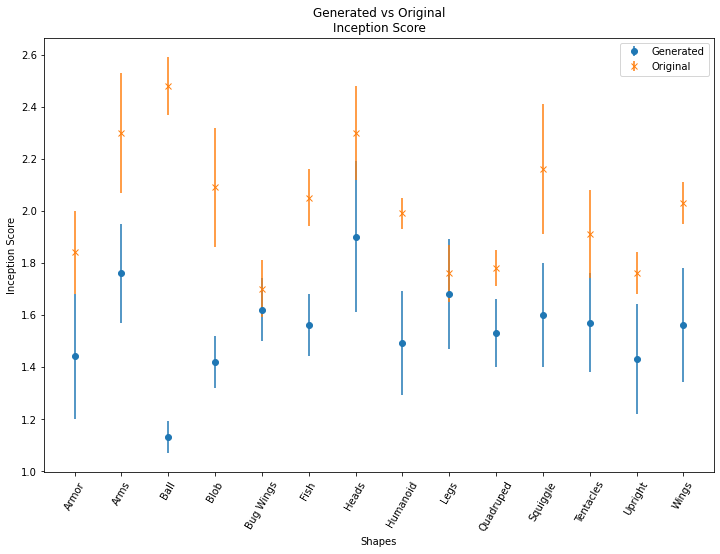

In [29]:
shapes = np.array(["Armor", "Arms", "Ball", "Blob", "Bug Wings", "Fish", "Heads", "Humanoid", "Legs", "Quadruped", "Squiggle", "Tentacles", "Upright", "Wings"])
shapes_generated_is_mean = np.array([1.44, 1.76, 1.13, 1.42, 1.62, 1.56, 1.90, 1.49, 1.68, 1.53, 1.60, 1.57, 1.43, 1.56])
shapes_generated_is_std = np.array([0.24, 0.19, 0.06, 0.10, 0.12, 0.12, 0.29, 0.20, 0.21, 0.13, 0.20, 0.19, 0.21, 0.22])
shapes_original_is_mean = np.array([1.84, 2.30, 2.48, 2.09, 1.70, 2.05, 2.30, 1.99, 1.76, 1.78, 2.16, 1.91, 1.76, 2.03])
shapes_original_is_std = np.array([0.16, 0.23, 0.11, 0.23, 0.11, 0.11, 0.18, 0.06, 0.11, 0.07, 0.25, 0.17, 0.08, 0.08])

fig, ax = plt.subplots(figsize=(12,8))
ax.errorbar(range(len(shapes)), shapes_generated_is_mean, yerr=shapes_generated_is_std, fmt='o', label="Generated")
ax.errorbar(range(len(shapes)), shapes_original_is_mean, yerr=shapes_original_is_std, fmt='x', label="Original")
ax.set(title = "Generated vs Original\nInception Score",
       xlabel = "Shapes",
       ylabel = "Inception Score")
ax.legend()
plt.xticks(range(len(shapes)), shapes)
plt.setp(ax.get_xticklabels(), rotation = 60)
plt.savefig('Shapes Generated vs Original Inception Score.png')
plt.show()

# SHAPES

In [6]:
test_shapes = ["armor", "arms", "ball"]
original_folders_list_shapes = ["armor", "arns", "ball", "blob", "bug_wings", "fish", "heads", "humanoid", "legs", "quadruped", "squiggle", "tentacles", "upright", "wings"]
generated_folders_list_shapes = ["armor", "arns", "ball", "blob", "bug_wings", "fish", "heads", "humanoid", "legs", "quadruped", "squiggle", "tentacles", "upright", "wings"]
original_folder_path_shapes = "D:\IDG_Malta_Master_Thesis\pokemon_assets_generation\_Sprite_Sheets\PokeTypeGAN-main\sprites\original_sprites_shapes\\"
generated_folder_path_shapes = "D:\IDG_Malta_Master_Thesis\pokemon_assets_generation\_Sprite_Sheets\PokeTypeGAN-main\sprites\individual\shapes\\"

test_matrix_shapes = np.zeros(shape=(2,2))
original_matrix_shapes = np.zeros(shape=(14,14))
generated_matrix_shapes = np.zeros(shape=(14,14))
original_vs_generated_matrix_shapes = np.zeros(shape=(14,14))

In [10]:
import pandas as pd
shapes = ["armor", "arns", "ball", "blob", "bug_wings", "fish", "heads", "humanoid", "legs", "quadruped", "squiggle", "tentacles", "upright", "wings"]
num_rows = len(shapes)
num_cols = len(shapes)
data = np.zeros((num_rows, num_cols))
df_original_shapes = pd.DataFrame(data, columns=shapes, index=shapes)
df_generated_shapes = pd.DataFrame(data, columns=shapes, index=shapes)
df_generated_vs_original_shapes = pd.DataFrame(data, columns=shapes, index=shapes)

In [ ]:
df_test = get_FID_dataframe_for_sets(test_shapes,original_folder_path_shapes,test_shapes,generated_folder_path_shapes,False)
normalize_and_show_FID_df(df_test, "Generated vs Original Shapes FID", shapes)

In [ ]:
# ORIGINAL VS ORIGINAL SHAPES
df_original_shapes = get_FID_dataframe_for_sets(shapes, original_folder_path_shapes, shapes, original_folder_path_shapes, True)
print(df_original_shapes)
normalize_and_show_FID_df(df_original_shapes,"Original Shapes FID")

In [ ]:
# GENERATED VS GENERATED SHAPES
df_generated_shapes = get_FID_dataframe_for_sets(shapes, generated_folder_path_shapes, shapes, generated_folder_path_shapes, True)
print(df_generated_shapes)
normalize_and_show_FID_df(df_generated_shapes, "Generated FID")

In [ ]:
# ORIGINALORIGINALGENERATED VS ORIGINAL SHAPES
df_generated_vs_original = get_FID_dataframe_for_sets(types, generated_folder_path, types, original_folder_path, False)
print(df_generated_vs_original)
normalize_and_show_FID_df(df_generated_vs_original, "Generated vs Original FID")